This notebook compares the different collaborative filtering approaches — item-item based vs user-user based and four similarities option.

In [1]:
from surprise import SVD, SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [2]:
# Load the movielens-1M dataset
data = Dataset.load_builtin('ml-1m')

In [3]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

In [4]:
def recommendation(algo, trainset, testset):
  # Train the algorithm on the trainset, and predict ratings for the testset
  algo.fit(trainset)
  predictions = algo.test(testset)

  # Then compute RMSE
  accuracy.rmse(predictions)
  # Then compute MAE
  accuracy.mae(predictions)
  return

Comparison between 4 similarities

Cosine

In [10]:
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8919
MAE:  0.7017
Done!


In [11]:
sim_options = {'name': 'cosine'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9371
MAE:  0.7463


MSD

In [12]:
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8835
MAE:  0.6936
Done!


In [13]:
sim_options = {'name': 'msd'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9269
MAE:  0.7372


Pearson

In [14]:
sim_options = {'name': 'pearson',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8867
MAE:  0.6961
Done!


In [15]:
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9160
MAE:  0.7218


Pearson Baseline

In [16]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8562
MAE:  0.6705
Done!


In [17]:
sim_options = {'name': 'pearson_baseline'}
algo = KNNWithMeans(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8867
MAE:  0.6896


In [18]:
import matplotlib.pyplot as plt


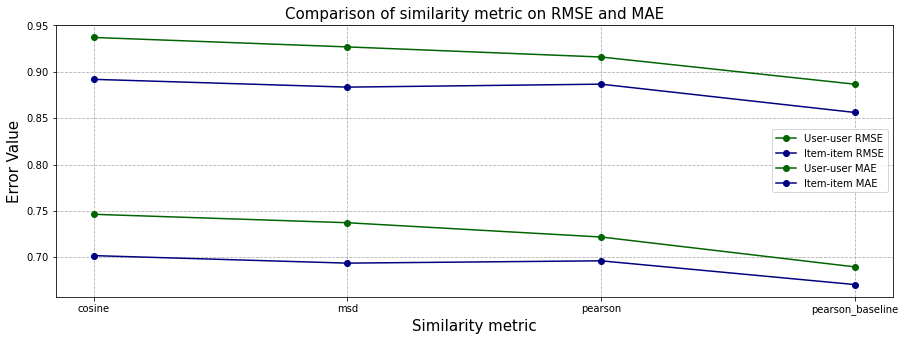

In [22]:
x_algo = ['cosine', 'msd', 'pearson', 'pearson_baseline']

item_rmse = [0.8919, 0.8835, 0.8867, 0.8562]
item_mae  = [0.7017, 0.6936, 0.6961, 0.6705]
user_rmse = [0.9371, 0.9269, 0.9160, 0.8867]
user_mae  = [0.7463, 0.7372, 0.7218, 0.6896]

plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)
plt.title('Comparison of similarity metric on RMSE and MAE', loc='center', fontsize=15)
plt.plot(x_algo, user_rmse, label='User-user RMSE', color='darkgreen', marker='o')
plt.plot(x_algo, item_rmse, label='Item-item RMSE', color='navy', marker='o')
plt.xlabel('Similarity metric', fontsize=15)
plt.ylabel('Error Value', fontsize=15)
# plt.legend()
# plt.grid(ls='dashed')
# plt.show()

# plt.subplot(1, 2, 1)
# plt.figure(figsize=(15,5))
# plt.title('Comparison of similarity metric on MAE', loc='center', fontsize=15)
plt.plot(x_algo, user_mae, label='User-user MAE', color='darkgreen', marker='o')
plt.plot(x_algo, item_mae, label='Item-item MAE', color='navy', marker='o')
# plt.xlabel('Similarity metric', fontsize=15)
# plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()